In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import time
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [31]:
df.shape

(4026, 7)

In [32]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [34]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffeness Et (MS)',
       'Period (P)'],
      dtype='object')

In [35]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [36]:
y=normalized_df["Period (P)"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

# NGBoost

In [12]:
import optuna
from ngboost import NGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 1000, 5000)
    learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)
    nbr_reg = NGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    nbr_reg.fit(X_train, y_train)
    y_pred = nbr_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse


# Start time
start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# End time
end_time = time.time()
# Calculate total time
total_time = end_time - start_time
print("Total time taken: ", total_time)
best_params = study.best_params
best_mse = study.best_value
print("Best Parameters: ", best_params)
print("Best MSE: ", best_mse)

[I 2024-01-01 11:14:02,214] A new study created in memory with name: no-name-5e611008-90a0-4af9-9c91-a570cf6fa053
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1707 val_loss=0.0000 scale=1.0000 norm=0.4092
[iter 200] loss=-3.3411 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.5034 val_loss=0.0000 scale=1.0000 norm=0.4158
[iter 400] loss=-3.5880 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.6211 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6224 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 700] loss=-3.6588 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.6819 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.6870 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7150 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7174 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7182 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7164 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7286 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.74

[I 2024-01-01 11:15:00,320] Trial 0 finished with value: 7.395342471927014e-05 and parameters: {'n_estimators': 3075, 'learning_rate': 0.49942193497360154}. Best is trial 0 with value: 7.395342471927014e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1048 val_loss=0.0000 scale=0.5000 norm=0.2000
[iter 200] loss=-3.4033 val_loss=0.0000 scale=0.2500 norm=0.1020
[iter 300] loss=-3.5242 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.5238 val_loss=0.0000 scale=0.1250 norm=0.0514
[iter 500] loss=-3.6064 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6061 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.6408 val_loss=0.0000 scale=1.0000 norm=0.4095
[iter 800] loss=-3.6822 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.6936 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6934 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7021 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7036 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7051 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7049 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.70

[I 2024-01-01 11:16:02,044] Trial 1 finished with value: 7.401126650005833e-05 and parameters: {'n_estimators': 3232, 'learning_rate': 0.3814536680069899}. Best is trial 0 with value: 7.395342471927014e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0293 val_loss=0.0000 scale=1.0000 norm=0.4029
[iter 200] loss=-3.3050 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.3613 val_loss=0.0000 scale=0.5000 norm=0.2025
[iter 400] loss=-3.4596 val_loss=0.0000 scale=0.0625 norm=0.0253
[iter 500] loss=-3.5693 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.5765 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.6627 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.6676 val_loss=0.0000 scale=1.0000 norm=0.4162
[iter 900] loss=-3.7605 val_loss=0.0000 scale=1.0000 norm=0.4130
[iter 1000] loss=-3.7696 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7729 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7787 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7800 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7841 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.80

[I 2024-01-01 11:16:40,773] Trial 2 finished with value: 9.697418690403428e-05 and parameters: {'n_estimators': 2017, 'learning_rate': 0.5135285703755009}. Best is trial 0 with value: 7.395342471927014e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2927 val_loss=0.0000 scale=1.0000 norm=0.4147
[iter 200] loss=-3.4633 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.6146 val_loss=0.0000 scale=2.0000 norm=0.8216
[iter 400] loss=-3.6609 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.7008 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7128 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 700] loss=-3.7268 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7877 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7873 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7875 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7897 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.7963 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 1300] loss=-3.7993 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7989 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.85

[I 2024-01-01 11:17:59,448] Trial 3 finished with value: 7.062956490646486e-05 and parameters: {'n_estimators': 4094, 'learning_rate': 0.5356509495814795}. Best is trial 3 with value: 7.062956490646486e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1815 val_loss=0.0000 scale=1.0000 norm=0.4195
[iter 200] loss=-3.2969 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 300] loss=-3.2967 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.3955 val_loss=0.0000 scale=1.0000 norm=0.4217
[iter 500] loss=-3.4002 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 600] loss=-3.4392 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.4586 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 800] loss=-3.4651 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 900] loss=-3.5331 val_loss=0.0000 scale=1.0000 norm=0.4187
[iter 1000] loss=-3.6072 val_loss=0.0000 scale=0.2500 norm=0.1060
[iter 1100] loss=-3.7121 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7120 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7339 val_loss=0.0000 scale=0.5000 norm=0.2072
[iter 1400] loss=-3.7606 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.77

[I 2024-01-01 11:18:53,014] Trial 4 finished with value: 8.014500501081087e-05 and parameters: {'n_estimators': 3059, 'learning_rate': 0.33811329174679705}. Best is trial 3 with value: 7.062956490646486e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0907 val_loss=0.0000 scale=1.0000 norm=0.4144
[iter 200] loss=-3.3697 val_loss=0.0000 scale=1.0000 norm=0.4131
[iter 300] loss=-3.4541 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.5061 val_loss=0.0000 scale=0.2500 norm=0.1032
[iter 500] loss=-3.6081 val_loss=0.0000 scale=0.2500 norm=0.1020
[iter 600] loss=-3.6553 val_loss=0.0000 scale=1.0000 norm=0.4107
[iter 700] loss=-3.6743 val_loss=0.0000 scale=0.5000 norm=0.2037
[iter 800] loss=-3.7158 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7161 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7181 val_loss=0.0000 scale=1.0000 norm=0.4060
[iter 1100] loss=-3.7383 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7553 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7735 val_loss=0.0000 scale=1.0000 norm=0.4042
[iter 1400] loss=-3.8112 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-3.81

[I 2024-01-01 11:19:35,975] Trial 5 finished with value: 6.810173814562518e-05 and parameters: {'n_estimators': 2640, 'learning_rate': 0.3069502732772381}. Best is trial 5 with value: 6.810173814562518e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2576 val_loss=0.0000 scale=0.5000 norm=0.2058
[iter 200] loss=-3.4721 val_loss=0.0000 scale=0.5000 norm=0.2077
[iter 300] loss=-3.6225 val_loss=0.0000 scale=0.5000 norm=0.2076
[iter 400] loss=-3.6309 val_loss=0.0000 scale=0.2500 norm=0.1043
[iter 500] loss=-3.6887 val_loss=0.0000 scale=0.5000 norm=0.2084
[iter 600] loss=-3.7164 val_loss=0.0000 scale=1.0000 norm=0.4154
[iter 700] loss=-3.7374 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7704 val_loss=0.0000 scale=2.0000 norm=0.8270
[iter 900] loss=-3.7938 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7936 val_loss=0.0000 scale=0.2500 norm=0.1034
[iter 1100] loss=-3.8208 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.8262 val_loss=0.0000 scale=0.1250 norm=0.0519
[iter 1300] loss=-3.8282 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.8310 val_loss=0.0000 scale=0.5000 norm=0.2072
[iter 1500] loss=-3.83

[I 2024-01-01 11:20:12,346] Trial 6 finished with value: 8.769932545011703e-05 and parameters: {'n_estimators': 2210, 'learning_rate': 0.3257341856627446}. Best is trial 5 with value: 6.810173814562518e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0930 val_loss=0.0000 scale=0.2500 norm=0.1008
[iter 200] loss=-3.3425 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.3958 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.3945 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.4305 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.5437 val_loss=0.0000 scale=0.5000 norm=0.2064
[iter 700] loss=-3.5635 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.5785 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.5815 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.5797 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6137 val_loss=0.0000 scale=0.0039 norm=0.0016


[I 2024-01-01 11:20:31,665] Trial 7 finished with value: 0.00011395723550100156 and parameters: {'n_estimators': 1105, 'learning_rate': 0.4834564275797286}. Best is trial 5 with value: 6.810173814562518e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0012 val_loss=0.0000 scale=0.0625 norm=0.0257
[iter 200] loss=-3.3440 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.4286 val_loss=0.0000 scale=0.5000 norm=0.2018
[iter 400] loss=-3.5261 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.5248 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 600] loss=-3.5216 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.5425 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.5478 val_loss=0.0000 scale=0.5000 norm=0.2001
[iter 900] loss=-3.6292 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6394 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6455 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.6719 val_loss=0.0000 scale=0.2500 norm=0.1023
[iter 1300] loss=-3.6930 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7219 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.72

[I 2024-01-01 11:20:59,915] Trial 8 finished with value: 0.00011681598826677196 and parameters: {'n_estimators': 1633, 'learning_rate': 0.5804168854698942}. Best is trial 5 with value: 6.810173814562518e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0303 val_loss=0.0000 scale=0.5000 norm=0.2148
[iter 200] loss=-3.2503 val_loss=0.0000 scale=1.0000 norm=0.4299
[iter 300] loss=-3.3219 val_loss=0.0000 scale=0.2500 norm=0.1052
[iter 400] loss=-3.3797 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.4664 val_loss=0.0000 scale=1.0000 norm=0.4182
[iter 600] loss=-3.4851 val_loss=0.0000 scale=1.0000 norm=0.4164
[iter 700] loss=-3.4890 val_loss=0.0000 scale=0.0156 norm=0.0065
[iter 800] loss=-3.4894 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 900] loss=-3.4898 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.4897 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 1100] loss=-3.4933 val_loss=0.0000 scale=0.5000 norm=0.2081
[iter 1200] loss=-3.4993 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.4995 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.5104 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.51

[I 2024-01-01 11:22:17,375] Trial 9 finished with value: 8.250505286108448e-05 and parameters: {'n_estimators': 4416, 'learning_rate': 0.12794446992945516}. Best is trial 5 with value: 6.810173814562518e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.9571 val_loss=0.0000 scale=0.5000 norm=0.2161
[iter 200] loss=-3.0089 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.3173 val_loss=0.0000 scale=1.0000 norm=0.4284
[iter 400] loss=-3.4559 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 500] loss=-3.5408 val_loss=0.0000 scale=1.0000 norm=0.4164
[iter 600] loss=-3.6120 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.6165 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.6559 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7030 val_loss=0.0000 scale=0.2500 norm=0.1020
[iter 1000] loss=-3.7143 val_loss=0.0000 scale=0.0156 norm=0.0064
[iter 1100] loss=-3.7588 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-3.7748 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7802 val_loss=0.0000 scale=1.0000 norm=0.3991
[iter 1400] loss=-3.8182 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.83

[I 2024-01-01 11:23:25,278] Trial 10 finished with value: 9.58004777620474e-05 and parameters: {'n_estimators': 3988, 'learning_rate': 0.7903464022206964}. Best is trial 5 with value: 6.810173814562518e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.3768 val_loss=0.0000 scale=2.0000 norm=0.7830
[iter 200] loss=-2.9348 val_loss=0.0000 scale=1.0000 norm=0.4016
[iter 300] loss=-3.0703 val_loss=0.0000 scale=1.0000 norm=0.4162
[iter 400] loss=-3.1537 val_loss=0.0000 scale=1.0000 norm=0.4096
[iter 500] loss=-3.2275 val_loss=0.0000 scale=1.0000 norm=0.4059
[iter 600] loss=-3.2764 val_loss=0.0000 scale=0.2500 norm=0.1018
[iter 700] loss=-3.3155 val_loss=0.0000 scale=1.0000 norm=0.4081
[iter 800] loss=-3.3497 val_loss=0.0000 scale=0.2500 norm=0.1024
[iter 900] loss=-3.3745 val_loss=0.0000 scale=0.2500 norm=0.1025
[iter 1000] loss=-3.3917 val_loss=0.0000 scale=1.0000 norm=0.4080
[iter 1100] loss=-3.4111 val_loss=0.0000 scale=1.0000 norm=0.4063
[iter 1200] loss=-3.4117 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 1300] loss=-3.4121 val_loss=0.0000 scale=1.0000 norm=0.4070
[iter 1400] loss=-3.4327 val_loss=0.0000 scale=0.2500 norm=0.1017
[iter 1500] loss=-3.44

[I 2024-01-01 11:24:50,658] Trial 11 finished with value: 0.00011696648374806582 and parameters: {'n_estimators': 4903, 'learning_rate': 0.03141340683305982}. Best is trial 5 with value: 6.810173814562518e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.9751 val_loss=0.0000 scale=1.0000 norm=0.4383
[iter 200] loss=-3.3781 val_loss=0.0000 scale=1.0000 norm=0.4245
[iter 300] loss=-3.6143 val_loss=0.0000 scale=1.0000 norm=0.4136
[iter 400] loss=-3.7491 val_loss=0.0000 scale=1.0000 norm=0.4048
[iter 500] loss=-3.7768 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7907 val_loss=0.0000 scale=0.1250 norm=0.0502
[iter 700] loss=-3.8201 val_loss=0.0000 scale=1.0000 norm=0.3926
[iter 800] loss=-3.8347 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 900] loss=-3.9016 val_loss=0.0000 scale=1.0000 norm=0.3966
[iter 1000] loss=-3.9528 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-3.9801 val_loss=0.0000 scale=0.5000 norm=0.1955
[iter 1200] loss=-4.0123 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0484 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1400] loss=-4.0648 val_loss=0.0000 scale=1.0000 norm=0.3823
[iter 1500] loss=-4.07

[I 2024-01-01 11:26:19,451] Trial 12 finished with value: 6.609412884416653e-05 and parameters: {'n_estimators': 3806, 'learning_rate': 0.9674802821958264}. Best is trial 12 with value: 6.609412884416653e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.9505 val_loss=0.0000 scale=0.5000 norm=0.2172
[iter 200] loss=-3.2165 val_loss=0.0000 scale=1.0000 norm=0.4264
[iter 300] loss=-3.4641 val_loss=0.0000 scale=1.0000 norm=0.4284
[iter 400] loss=-3.5380 val_loss=0.0000 scale=1.0000 norm=0.4278
[iter 500] loss=-3.6307 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 600] loss=-3.6559 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7487 val_loss=0.0000 scale=1.0000 norm=0.4160
[iter 800] loss=-3.8342 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 900] loss=-3.8747 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.8983 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9166 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.9474 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-3.9455 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.9421 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.99

[I 2024-01-01 11:27:47,027] Trial 13 finished with value: 7.332479981955927e-05 and parameters: {'n_estimators': 3550, 'learning_rate': 0.9613778438919263}. Best is trial 12 with value: 6.609412884416653e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0580 val_loss=0.0000 scale=1.0000 norm=0.4540
[iter 200] loss=-3.4175 val_loss=0.0000 scale=0.5000 norm=0.2146
[iter 300] loss=-3.4464 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 400] loss=-3.4455 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.4730 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 600] loss=-3.5654 val_loss=0.0000 scale=1.0000 norm=0.4270
[iter 700] loss=-3.5957 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.6581 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7050 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7459 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.8099 val_loss=0.0000 scale=1.0000 norm=0.4087
[iter 1200] loss=-3.8374 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.8367 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-3.8710 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.86

[I 2024-01-01 11:28:50,371] Trial 14 finished with value: 7.418337890152557e-05 and parameters: {'n_estimators': 2634, 'learning_rate': 0.9868246047096789}. Best is trial 12 with value: 6.609412884416653e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1279 val_loss=0.0000 scale=1.0000 norm=0.4354
[iter 200] loss=-3.4838 val_loss=0.0000 scale=0.5000 norm=0.2143
[iter 300] loss=-3.6772 val_loss=0.0000 scale=1.0000 norm=0.4240
[iter 400] loss=-3.7625 val_loss=0.0000 scale=0.5000 norm=0.2108
[iter 500] loss=-3.8319 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.8315 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.8903 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.8917 val_loss=0.0000 scale=0.5000 norm=0.2047
[iter 900] loss=-3.9554 val_loss=0.0000 scale=0.5000 norm=0.2023
[iter 1000] loss=-3.9960 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-4.0233 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-4.0549 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0999 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.1297 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.14

[I 2024-01-01 11:29:48,198] Trial 15 finished with value: 5.798311769566367e-05 and parameters: {'n_estimators': 2534, 'learning_rate': 0.7327591366253451}. Best is trial 15 with value: 5.798311769566367e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.9941 val_loss=0.0000 scale=1.0000 norm=0.4351
[iter 200] loss=-3.3374 val_loss=0.0000 scale=1.0000 norm=0.4155
[iter 300] loss=-3.3928 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.5090 val_loss=0.0000 scale=1.0000 norm=0.4175
[iter 500] loss=-3.5751 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.5891 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.5930 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.6455 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.6457 val_loss=0.0000 scale=1.0000 norm=0.4025
[iter 1000] loss=-3.6673 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-3.7071 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7356 val_loss=0.0000 scale=0.0312 norm=0.0124
[iter 1300] loss=-3.7387 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7588 val_loss=0.0000 scale=0.0625 norm=0.0248
[iter 1500] loss=-3.76

[I 2024-01-01 11:31:05,046] Trial 16 finished with value: 9.030241907642531e-05 and parameters: {'n_estimators': 3562, 'learning_rate': 0.8052399134849538}. Best is trial 15 with value: 5.798311769566367e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0140 val_loss=0.0000 scale=0.5000 norm=0.2126
[iter 200] loss=-3.3144 val_loss=0.0000 scale=1.0000 norm=0.4085
[iter 300] loss=-3.3978 val_loss=0.0000 scale=0.5000 norm=0.2034
[iter 400] loss=-3.4612 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.4863 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.4870 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.5212 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.5547 val_loss=0.0000 scale=1.0000 norm=0.4004
[iter 900] loss=-3.5826 val_loss=0.0000 scale=0.5000 norm=0.2009
[iter 1000] loss=-3.6147 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6310 val_loss=0.0000 scale=0.5000 norm=0.2008
[iter 1200] loss=-3.6350 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.6333 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.6837 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-3.69

[I 2024-01-01 11:31:46,091] Trial 17 finished with value: 9.06514603633175e-05 and parameters: {'n_estimators': 2510, 'learning_rate': 0.7889232729452278}. Best is trial 15 with value: 5.798311769566367e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2597 val_loss=0.0000 scale=1.0000 norm=0.4186
[iter 200] loss=-3.4059 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.5425 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 400] loss=-3.6299 val_loss=0.0000 scale=1.0000 norm=0.4087
[iter 500] loss=-3.7043 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7387 val_loss=0.0000 scale=1.0000 norm=0.3957
[iter 700] loss=-3.7388 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 800] loss=-3.7667 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7731 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7872 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-3.7986 val_loss=0.0000 scale=1.0000 norm=0.3976
[iter 1200] loss=-3.8444 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.8607 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.8849 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.88

[I 2024-01-01 11:33:12,560] Trial 18 finished with value: 6.317209709351785e-05 and parameters: {'n_estimators': 4693, 'learning_rate': 0.6777678951188609}. Best is trial 15 with value: 5.798311769566367e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2185 val_loss=0.0000 scale=1.0000 norm=0.4241
[iter 200] loss=-3.4650 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.5734 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 400] loss=-3.5765 val_loss=0.0000 scale=0.5000 norm=0.2070
[iter 500] loss=-3.6866 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7094 val_loss=0.0000 scale=0.5000 norm=0.2034
[iter 700] loss=-3.7406 val_loss=0.0000 scale=0.2500 norm=0.1004
[iter 800] loss=-3.7655 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.8395 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1000] loss=-3.8648 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9142 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-3.9324 val_loss=0.0000 scale=0.0156 norm=0.0062
[iter 1300] loss=-3.9474 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-3.9665 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-3.97

[I 2024-01-01 11:34:35,905] Trial 19 finished with value: 6.708761032230795e-05 and parameters: {'n_estimators': 4994, 'learning_rate': 0.6447891900315913}. Best is trial 15 with value: 5.798311769566367e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1829 val_loss=0.0000 scale=0.1250 norm=0.0518
[iter 200] loss=-3.4736 val_loss=0.0000 scale=0.2500 norm=0.1045
[iter 300] loss=-3.6230 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.6448 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.6840 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7080 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 700] loss=-3.7769 val_loss=0.0000 scale=0.5000 norm=0.2037
[iter 800] loss=-3.7909 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.8028 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.8399 val_loss=0.0000 scale=1.0000 norm=0.4095
[iter 1100] loss=-3.8683 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8670 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-3.8745 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.8790 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.88

[I 2024-01-01 11:35:04,175] Trial 20 finished with value: 9.644408774851229e-05 and parameters: {'n_estimators': 1650, 'learning_rate': 0.6853629288933394}. Best is trial 15 with value: 5.798311769566367e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0574 val_loss=0.0000 scale=0.0625 norm=0.0279
[iter 200] loss=-3.0717 val_loss=0.0000 scale=0.0020 norm=0.0009
[iter 300] loss=-3.1222 val_loss=0.0000 scale=0.5000 norm=0.2235
[iter 400] loss=-3.4732 val_loss=0.0000 scale=1.0000 norm=0.4272
[iter 500] loss=-3.6666 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6792 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7492 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7563 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7702 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.8109 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-3.8494 val_loss=0.0000 scale=1.0000 norm=0.4027
[iter 1200] loss=-3.8714 val_loss=0.0000 scale=0.5000 norm=0.2007
[iter 1300] loss=-3.8770 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-3.9120 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.94

[I 2024-01-01 11:36:17,525] Trial 21 finished with value: 8.095485437800454e-05 and parameters: {'n_estimators': 4471, 'learning_rate': 0.896012173931461}. Best is trial 15 with value: 5.798311769566367e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1009 val_loss=0.0000 scale=1.0000 norm=0.4459
[iter 200] loss=-3.4861 val_loss=0.0000 scale=1.0000 norm=0.4257
[iter 300] loss=-3.6913 val_loss=0.0000 scale=1.0000 norm=0.4233
[iter 400] loss=-3.7531 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.8396 val_loss=0.0000 scale=0.5000 norm=0.2069
[iter 600] loss=-3.8673 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.9101 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.9206 val_loss=0.0000 scale=0.5000 norm=0.2044
[iter 900] loss=-3.9703 val_loss=0.0000 scale=0.5000 norm=0.2009
[iter 1000] loss=-4.0111 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-4.0437 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-4.0537 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-4.0909 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-4.0988 val_loss=0.0000 scale=0.0156 norm=0.0062
[iter 1500] loss=-4.11

[I 2024-01-01 11:37:16,581] Trial 22 finished with value: 6.775996543405486e-05 and parameters: {'n_estimators': 3728, 'learning_rate': 0.8756614767155076}. Best is trial 15 with value: 5.798311769566367e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1294 val_loss=0.0000 scale=1.0000 norm=0.4206
[iter 200] loss=-3.3817 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.5388 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.5628 val_loss=0.0000 scale=0.1250 norm=0.0531
[iter 500] loss=-3.5660 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 600] loss=-3.5716 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 700] loss=-3.6816 val_loss=0.0000 scale=1.0000 norm=0.4190
[iter 800] loss=-3.7043 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7145 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7140 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7269 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7541 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7613 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7710 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.80

[I 2024-01-01 11:38:40,022] Trial 23 finished with value: 8.043245914900594e-05 and parameters: {'n_estimators': 4654, 'learning_rate': 0.7140108670588788}. Best is trial 15 with value: 5.798311769566367e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1627 val_loss=0.0000 scale=1.0000 norm=0.4446
[iter 200] loss=-3.5806 val_loss=0.0000 scale=0.5000 norm=0.2203
[iter 300] loss=-3.7972 val_loss=0.0000 scale=1.0000 norm=0.4235
[iter 400] loss=-3.8713 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.9663 val_loss=0.0000 scale=0.5000 norm=0.2039
[iter 600] loss=-3.9986 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-4.0064 val_loss=0.0000 scale=0.5000 norm=0.2048
[iter 800] loss=-4.0582 val_loss=0.0000 scale=1.0000 norm=0.4022
[iter 900] loss=-4.1056 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-4.1193 val_loss=0.0000 scale=0.0156 norm=0.0063
[iter 1100] loss=-4.1386 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-4.1497 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.1601 val_loss=0.0000 scale=1.0000 norm=0.3987
[iter 1400] loss=-4.1667 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.19

[I 2024-01-01 11:39:58,657] Trial 24 finished with value: 5.592775553556088e-05 and parameters: {'n_estimators': 4140, 'learning_rate': 0.8854198851197161}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0993 val_loss=0.0000 scale=1.0000 norm=0.4441
[iter 200] loss=-3.4747 val_loss=0.0000 scale=1.0000 norm=0.4343
[iter 300] loss=-3.5397 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.5717 val_loss=0.0000 scale=0.5000 norm=0.2163
[iter 500] loss=-3.7001 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 600] loss=-3.7659 val_loss=0.0000 scale=0.5000 norm=0.2106
[iter 700] loss=-3.8541 val_loss=0.0000 scale=0.5000 norm=0.2076
[iter 800] loss=-3.8954 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 900] loss=-3.9062 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.9395 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9464 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.9739 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-4.0000 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-4.0433 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-4.04

[I 2024-01-01 11:41:42,460] Trial 25 finished with value: 5.785978771443299e-05 and parameters: {'n_estimators': 4246, 'learning_rate': 0.7486790831114187}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2749 val_loss=0.0000 scale=1.0000 norm=0.4430
[iter 200] loss=-3.6344 val_loss=0.0000 scale=1.0000 norm=0.4288
[iter 300] loss=-3.8072 val_loss=0.0000 scale=0.1250 norm=0.0522
[iter 400] loss=-3.8761 val_loss=0.0000 scale=0.5000 norm=0.2058
[iter 500] loss=-3.9181 val_loss=0.0000 scale=0.5000 norm=0.2051
[iter 600] loss=-3.9484 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.9479 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.9771 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-4.0075 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1000] loss=-4.0346 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-4.0479 val_loss=0.0000 scale=1.0000 norm=0.4028
[iter 1200] loss=-4.1022 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.1179 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-4.1230 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-4.13

[I 2024-01-01 11:43:28,090] Trial 26 finished with value: 6.956209241415398e-05 and parameters: {'n_estimators': 4220, 'learning_rate': 0.8720074451734068}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1644 val_loss=0.0000 scale=1.0000 norm=0.4273
[iter 200] loss=-3.5756 val_loss=0.0000 scale=1.0000 norm=0.4205
[iter 300] loss=-3.6319 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.6433 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.7004 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.8292 val_loss=0.0000 scale=0.5000 norm=0.2067
[iter 700] loss=-3.9117 val_loss=0.0000 scale=1.0000 norm=0.4106
[iter 800] loss=-4.0221 val_loss=0.0000 scale=0.2500 norm=0.0993
[iter 900] loss=-4.0933 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-4.1165 val_loss=0.0000 scale=0.0625 norm=0.0248
[iter 1100] loss=-4.1368 val_loss=0.0000 scale=0.5000 norm=0.1980
[iter 1200] loss=-4.1521 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.1585 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.1663 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.18

[I 2024-01-01 11:44:24,348] Trial 27 finished with value: 6.938438279015333e-05 and parameters: {'n_estimators': 3526, 'learning_rate': 0.7737563587641787}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2459 val_loss=0.0000 scale=1.0000 norm=0.4402
[iter 200] loss=-3.5247 val_loss=0.0000 scale=1.0000 norm=0.4290
[iter 300] loss=-3.6564 val_loss=0.0000 scale=1.0000 norm=0.4231
[iter 400] loss=-3.8008 val_loss=0.0000 scale=1.0000 norm=0.4203
[iter 500] loss=-3.8679 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 600] loss=-3.8960 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 700] loss=-3.9529 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.9910 val_loss=0.0000 scale=0.5000 norm=0.2027
[iter 900] loss=-4.0194 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-4.0280 val_loss=0.0000 scale=0.0156 norm=0.0063
[iter 1100] loss=-4.0491 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-4.0738 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0778 val_loss=0.0000 scale=0.5000 norm=0.2019
[iter 1400] loss=-4.0939 val_loss=0.0000 scale=0.5000 norm=0.2016
[iter 1500] loss=-4.10

[I 2024-01-01 11:45:16,563] Trial 28 finished with value: 5.981040608108265e-05 and parameters: {'n_estimators': 3308, 'learning_rate': 0.7342792552269599}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0395 val_loss=0.0000 scale=1.0000 norm=0.4204
[iter 200] loss=-3.2844 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.3255 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.3890 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.4293 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.4827 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 700] loss=-3.5202 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 800] loss=-3.5275 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 900] loss=-3.5373 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.5389 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 1100] loss=-3.5401 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.5520 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.5791 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1400] loss=-3.6151 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-3.62

[I 2024-01-01 11:45:51,637] Trial 29 finished with value: 0.00014545599905809885 and parameters: {'n_estimators': 2088, 'learning_rate': 0.6205288896246329}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2209 val_loss=0.0000 scale=0.5000 norm=0.2209
[iter 200] loss=-3.4600 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 300] loss=-3.5305 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.6768 val_loss=0.0000 scale=1.0000 norm=0.4198
[iter 500] loss=-3.7463 val_loss=0.0000 scale=1.0000 norm=0.4116
[iter 600] loss=-3.7718 val_loss=0.0000 scale=1.0000 norm=0.4142
[iter 700] loss=-3.8132 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.8305 val_loss=0.0000 scale=0.0156 norm=0.0064
[iter 900] loss=-3.8726 val_loss=0.0000 scale=1.0000 norm=0.4139
[iter 1000] loss=-3.9165 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9306 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.9545 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.9558 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-3.9763 val_loss=0.0000 scale=0.1250 norm=0.0511
[iter 1500] loss=-3.99

[I 2024-01-01 11:46:35,100] Trial 30 finished with value: 7.004606433190711e-05 and parameters: {'n_estimators': 2736, 'learning_rate': 0.7254639692236183}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2128 val_loss=0.0000 scale=1.0000 norm=0.4247
[iter 200] loss=-3.5474 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 300] loss=-3.7119 val_loss=0.0000 scale=2.0000 norm=0.8412
[iter 400] loss=-3.8222 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.8429 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.8734 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.8921 val_loss=0.0000 scale=1.0000 norm=0.4158
[iter 800] loss=-3.9205 val_loss=0.0000 scale=0.5000 norm=0.2072
[iter 900] loss=-3.9612 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.9973 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-4.0335 val_loss=0.0000 scale=2.0000 norm=0.8144
[iter 1200] loss=-4.0365 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-4.0608 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-4.0943 val_loss=0.0000 scale=1.0000 norm=0.4019
[iter 1500] loss=-4.10

[I 2024-01-01 11:47:26,641] Trial 31 finished with value: 5.8365450674146074e-05 and parameters: {'n_estimators': 3221, 'learning_rate': 0.7295742643436745}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1132 val_loss=0.0000 scale=1.0000 norm=0.4521
[iter 200] loss=-3.5059 val_loss=0.0000 scale=1.0000 norm=0.4327
[iter 300] loss=-3.6074 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.6850 val_loss=0.0000 scale=1.0000 norm=0.4215
[iter 500] loss=-3.7355 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 600] loss=-3.7527 val_loss=0.0000 scale=0.5000 norm=0.2114
[iter 700] loss=-3.7859 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 800] loss=-3.8179 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.8303 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.8445 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.8705 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.9003 val_loss=0.0000 scale=0.5000 norm=0.2059
[iter 1300] loss=-3.9478 val_loss=0.0000 scale=0.5000 norm=0.2056
[iter 1400] loss=-3.9701 val_loss=0.0000 scale=0.0625 norm=0.0256
[iter 1500] loss=-3.97

[I 2024-01-01 11:48:13,090] Trial 32 finished with value: 7.812751999491267e-05 and parameters: {'n_estimators': 2947, 'learning_rate': 0.8304791254307372}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1348 val_loss=0.0000 scale=1.0000 norm=0.4363
[iter 200] loss=-3.4936 val_loss=0.0000 scale=1.0000 norm=0.4244
[iter 300] loss=-3.6746 val_loss=0.0000 scale=1.0000 norm=0.4208
[iter 400] loss=-3.7184 val_loss=0.0000 scale=1.0000 norm=0.4172
[iter 500] loss=-3.7839 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.8037 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.8317 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.8769 val_loss=0.0000 scale=0.2500 norm=0.1013
[iter 900] loss=-3.9050 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1000] loss=-3.9182 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9422 val_loss=0.0000 scale=0.0625 norm=0.0248
[iter 1200] loss=-3.9421 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-3.9562 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1400] loss=-3.9560 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.99

[I 2024-01-01 11:49:07,694] Trial 33 finished with value: 7.960143394909034e-05 and parameters: {'n_estimators': 3303, 'learning_rate': 0.9193567874090562}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1114 val_loss=0.0000 scale=1.0000 norm=0.4324
[iter 200] loss=-3.4856 val_loss=0.0000 scale=1.0000 norm=0.4245
[iter 300] loss=-3.6732 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.7163 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.8091 val_loss=0.0000 scale=1.0000 norm=0.4224
[iter 600] loss=-3.9325 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.9564 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.9789 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-4.0058 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-4.0186 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-4.0185 val_loss=0.0000 scale=1.0000 norm=0.4042
[iter 1200] loss=-4.0372 val_loss=0.0000 scale=0.0156 norm=0.0063
[iter 1300] loss=-4.0381 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-4.0415 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-4.05

[I 2024-01-01 11:49:46,189] Trial 34 finished with value: 8.762082447664356e-05 and parameters: {'n_estimators': 2402, 'learning_rate': 0.8409929729953441}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0899 val_loss=0.0000 scale=1.0000 norm=0.4337
[iter 200] loss=-3.4317 val_loss=0.0000 scale=0.5000 norm=0.2135
[iter 300] loss=-3.5663 val_loss=0.0000 scale=0.5000 norm=0.2094
[iter 400] loss=-3.6599 val_loss=0.0000 scale=1.0000 norm=0.4257
[iter 500] loss=-3.7786 val_loss=0.0000 scale=1.0000 norm=0.4132
[iter 600] loss=-3.8358 val_loss=0.0000 scale=1.0000 norm=0.4079
[iter 700] loss=-3.8601 val_loss=0.0000 scale=0.1250 norm=0.0513
[iter 800] loss=-3.8966 val_loss=0.0000 scale=0.1250 norm=0.0509
[iter 900] loss=-3.9212 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1000] loss=-3.9302 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-3.9427 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.9643 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-3.9671 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-3.9775 val_loss=0.0000 scale=2.0000 norm=0.8045
[iter 1500] loss=-4.00

[I 2024-01-01 11:50:53,713] Trial 35 finished with value: 6.436652263171824e-05 and parameters: {'n_estimators': 4247, 'learning_rate': 0.7536939716763276}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2149 val_loss=0.0000 scale=1.0000 norm=0.4477
[iter 200] loss=-3.5608 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 300] loss=-3.6696 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.7604 val_loss=0.0000 scale=1.0000 norm=0.4187
[iter 500] loss=-3.8762 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 600] loss=-3.9119 val_loss=0.0000 scale=1.0000 norm=0.4085
[iter 700] loss=-3.9283 val_loss=0.0000 scale=0.5000 norm=0.2003
[iter 800] loss=-3.9334 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.9338 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.9470 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9793 val_loss=0.0000 scale=0.5000 norm=0.1969
[iter 1200] loss=-4.0029 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0194 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.0336 val_loss=0.0000 scale=0.5000 norm=0.1979
[iter 1500] loss=-4.05

[I 2024-01-01 11:51:39,833] Trial 36 finished with value: 7.358420177269274e-05 and parameters: {'n_estimators': 2885, 'learning_rate': 0.9180469727910823}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0671 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 200] loss=-3.3049 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.3802 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.4315 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.4436 val_loss=0.0000 scale=0.2500 norm=0.1025
[iter 600] loss=-3.5045 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.5481 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.5718 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.5692 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6129 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6496 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.6480 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.6875 val_loss=0.0000 scale=0.5000 norm=0.2016
[iter 1400] loss=-3.7375 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-3.77

[I 2024-01-01 11:52:47,089] Trial 37 finished with value: 6.45551845914794e-05 and parameters: {'n_estimators': 3988, 'learning_rate': 0.6519553081618527}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1116 val_loss=0.0000 scale=1.0000 norm=0.4379
[iter 200] loss=-3.4867 val_loss=0.0000 scale=0.5000 norm=0.2078
[iter 300] loss=-3.7170 val_loss=0.0000 scale=1.0000 norm=0.4161
[iter 400] loss=-3.7823 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.7843 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 600] loss=-3.8008 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.8851 val_loss=0.0000 scale=1.0000 norm=0.4089
[iter 800] loss=-3.9803 val_loss=0.0000 scale=2.0000 norm=0.8072
[iter 900] loss=-4.0147 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-4.0315 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1100] loss=-4.0406 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1200] loss=-4.0666 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0759 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.0868 val_loss=0.0000 scale=0.0156 norm=0.0061
[iter 1500] loss=-4.11

[I 2024-01-01 11:53:37,038] Trial 38 finished with value: 6.123319750432096e-05 and parameters: {'n_estimators': 3134, 'learning_rate': 0.8447619972322953}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1983 val_loss=0.0000 scale=1.0000 norm=0.4146
[iter 200] loss=-3.3785 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.4385 val_loss=0.0000 scale=0.5000 norm=0.2077
[iter 400] loss=-3.5367 val_loss=0.0000 scale=0.2500 norm=0.1063
[iter 500] loss=-3.5370 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 600] loss=-3.5646 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 700] loss=-3.5619 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 800] loss=-3.5748 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.6031 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 1000] loss=-3.6623 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 1100] loss=-3.6607 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 1200] loss=-3.6573 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 1300] loss=-3.6544 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 1400] loss=-3.6744 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 1500] loss=-3.69

[I 2024-01-01 11:54:18,189] Trial 39 finished with value: 0.00010880097937430734 and parameters: {'n_estimators': 2318, 'learning_rate': 0.5850967307525914}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1848 val_loss=0.0000 scale=1.0000 norm=0.4314
[iter 200] loss=-3.5124 val_loss=0.0000 scale=1.0000 norm=0.4277
[iter 300] loss=-3.7305 val_loss=0.0000 scale=1.0000 norm=0.4170
[iter 400] loss=-3.8129 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.8273 val_loss=0.0000 scale=0.5000 norm=0.2075
[iter 600] loss=-3.8778 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 700] loss=-3.9371 val_loss=0.0000 scale=1.0000 norm=0.4155
[iter 800] loss=-3.9528 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 900] loss=-3.9824 val_loss=0.0000 scale=0.5000 norm=0.2058
[iter 1000] loss=-3.9981 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-4.0023 val_loss=0.0000 scale=0.0156 norm=0.0064
[iter 1200] loss=-4.0118 val_loss=0.0000 scale=0.5000 norm=0.2035
[iter 1300] loss=-4.0314 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.0402 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.05

[I 2024-01-01 11:55:20,032] Trial 40 finished with value: 6.661371409146411e-05 and parameters: {'n_estimators': 3826, 'learning_rate': 0.7420174925088028}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2101 val_loss=0.0000 scale=1.0000 norm=0.4385
[iter 200] loss=-3.5594 val_loss=0.0000 scale=1.0000 norm=0.4159
[iter 300] loss=-3.6412 val_loss=0.0000 scale=1.0000 norm=0.4185
[iter 400] loss=-3.7851 val_loss=0.0000 scale=1.0000 norm=0.4140
[iter 500] loss=-3.8282 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.9050 val_loss=0.0000 scale=1.0000 norm=0.4073
[iter 700] loss=-3.9419 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.9577 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 900] loss=-3.9691 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.9733 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9947 val_loss=0.0000 scale=2.0000 norm=0.8064
[iter 1200] loss=-4.0067 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0172 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.0447 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.06

[I 2024-01-01 11:56:12,413] Trial 41 finished with value: 5.775179513812409e-05 and parameters: {'n_estimators': 3272, 'learning_rate': 0.7372118842780503}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0264 val_loss=0.0000 scale=1.0000 norm=0.4326
[iter 200] loss=-3.3249 val_loss=0.0000 scale=1.0000 norm=0.4324
[iter 300] loss=-3.5686 val_loss=0.0000 scale=1.0000 norm=0.4214
[iter 400] loss=-3.6923 val_loss=0.0000 scale=0.5000 norm=0.2068
[iter 500] loss=-3.7697 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7923 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.8193 val_loss=0.0000 scale=0.2500 norm=0.1004
[iter 800] loss=-3.8313 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.8325 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.8529 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.8871 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.9075 val_loss=0.0000 scale=0.2500 norm=0.1012
[iter 1300] loss=-3.9396 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-3.9737 val_loss=0.0000 scale=0.2500 norm=0.1002
[iter 1500] loss=-3.98

[I 2024-01-01 11:57:06,237] Trial 42 finished with value: 8.643436830619508e-05 and parameters: {'n_estimators': 3424, 'learning_rate': 0.8109687113061181}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2014 val_loss=0.0000 scale=1.0000 norm=0.4205
[iter 200] loss=-3.4946 val_loss=0.0000 scale=1.0000 norm=0.4119
[iter 300] loss=-3.5395 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 400] loss=-3.5713 val_loss=0.0000 scale=0.2500 norm=0.1041
[iter 500] loss=-3.7269 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7432 val_loss=0.0000 scale=0.5000 norm=0.2025
[iter 700] loss=-3.7669 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7793 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.8349 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.8697 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.8701 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8771 val_loss=0.0000 scale=1.0000 norm=0.4091
[iter 1300] loss=-3.8903 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.9016 val_loss=0.0000 scale=1.0000 norm=0.4086
[iter 1500] loss=-3.91

[I 2024-01-01 11:57:55,578] Trial 43 finished with value: 7.439046612189615e-05 and parameters: {'n_estimators': 2831, 'learning_rate': 0.7076342447996824}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0585 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 200] loss=-3.0666 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.1484 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 400] loss=-3.1510 val_loss=0.0000 scale=0.0020 norm=0.0009
[iter 500] loss=-3.4067 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.4056 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 700] loss=-3.4058 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.4233 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.5522 val_loss=0.0000 scale=1.0000 norm=0.4134
[iter 1000] loss=-3.5931 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6605 val_loss=0.0000 scale=0.2500 norm=0.1019
[iter 1200] loss=-3.7139 val_loss=0.0000 scale=0.2500 norm=0.1031
[iter 1300] loss=-3.7821 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-3.8637 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-3.88

[I 2024-01-01 11:58:47,589] Trial 44 finished with value: 6.816587861572826e-05 and parameters: {'n_estimators': 3117, 'learning_rate': 0.7681923865291552}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2577 val_loss=0.0000 scale=1.0000 norm=0.4203
[iter 200] loss=-3.4700 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.5050 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 400] loss=-3.5582 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.6175 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6398 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.6934 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7089 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 900] loss=-3.7346 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.7564 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7579 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7661 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1300] loss=-3.7713 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.8043 val_loss=0.0000 scale=1.0000 norm=0.4012
[iter 1500] loss=-3.84

[I 2024-01-01 11:59:59,428] Trial 45 finished with value: 7.297619786084232e-05 and parameters: {'n_estimators': 4180, 'learning_rate': 0.6754143213941383}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1033 val_loss=0.0000 scale=0.2500 norm=0.0995
[iter 200] loss=-3.2402 val_loss=0.0000 scale=1.0000 norm=0.4019
[iter 300] loss=-3.3212 val_loss=0.0000 scale=1.0000 norm=0.3939
[iter 400] loss=-3.3402 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.5312 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.5307 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.5957 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.6088 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.6214 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6176 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6283 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.6429 val_loss=0.0000 scale=1.0000 norm=0.4030
[iter 1300] loss=-3.6866 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7316 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.73

[I 2024-01-01 12:00:30,131] Trial 46 finished with value: 0.0001091752668253701 and parameters: {'n_estimators': 1683, 'learning_rate': 0.5516455372229987}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0225 val_loss=0.0000 scale=1.0000 norm=0.4340
[iter 200] loss=-3.2425 val_loss=0.0000 scale=1.0000 norm=0.4329
[iter 300] loss=-3.5212 val_loss=0.0000 scale=1.0000 norm=0.4289
[iter 400] loss=-3.6047 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.6487 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6760 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 700] loss=-3.6893 val_loss=0.0000 scale=0.5000 norm=0.2059
[iter 800] loss=-3.6963 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7100 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7659 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.8071 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.8103 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-3.8242 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.8593 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-3.86

[I 2024-01-01 12:01:44,638] Trial 47 finished with value: 8.699729772156066e-05 and parameters: {'n_estimators': 4462, 'learning_rate': 0.8276058608883795}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1436 val_loss=0.0000 scale=0.5000 norm=0.2098
[iter 200] loss=-3.3890 val_loss=0.0000 scale=1.0000 norm=0.4182
[iter 300] loss=-3.5911 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 400] loss=-3.5910 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.6048 val_loss=0.0000 scale=0.2500 norm=0.1033
[iter 600] loss=-3.6253 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.6316 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.6395 val_loss=0.0000 scale=0.1250 norm=0.0512
[iter 900] loss=-3.6399 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6466 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 1100] loss=-3.6460 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.6969 val_loss=0.0000 scale=0.5000 norm=0.2060
[iter 1300] loss=-3.7464 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7463 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.75

[I 2024-01-01 12:02:48,480] Trial 48 finished with value: 7.399906902864332e-05 and parameters: {'n_estimators': 3698, 'learning_rate': 0.49707471941041215}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.9086 val_loss=0.0000 scale=1.0000 norm=0.4470
[iter 200] loss=-3.4244 val_loss=0.0000 scale=1.0000 norm=0.4306
[iter 300] loss=-3.6305 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.6999 val_loss=0.0000 scale=0.0312 norm=0.0133
[iter 500] loss=-3.7720 val_loss=0.0000 scale=1.0000 norm=0.4128
[iter 600] loss=-3.8136 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 700] loss=-3.8378 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.8949 val_loss=0.0000 scale=1.0000 norm=0.4003
[iter 900] loss=-3.9735 val_loss=0.0000 scale=0.2500 norm=0.1000
[iter 1000] loss=-3.9891 val_loss=0.0000 scale=1.0000 norm=0.3991
[iter 1100] loss=-4.0165 val_loss=0.0000 scale=1.0000 norm=0.3945
[iter 1200] loss=-4.0476 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0682 val_loss=0.0000 scale=1.0000 norm=0.3907
[iter 1400] loss=-4.0756 val_loss=0.0000 scale=0.0078 norm=0.0030
[iter 1500] loss=-4.07

[I 2024-01-01 12:03:49,648] Trial 49 finished with value: 6.971489105420972e-05 and parameters: {'n_estimators': 3902, 'learning_rate': 0.9967410444032822}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1132 val_loss=0.0000 scale=0.5000 norm=0.2222
[iter 200] loss=-3.4942 val_loss=0.0000 scale=1.0000 norm=0.4210
[iter 300] loss=-3.6434 val_loss=0.0000 scale=0.2500 norm=0.1049
[iter 400] loss=-3.7362 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.7958 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.8035 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.8271 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.8266 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 900] loss=-3.8665 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.8829 val_loss=0.0000 scale=0.0039 norm=0.0016


[I 2024-01-01 12:04:05,786] Trial 50 finished with value: 9.359104384710706e-05 and parameters: {'n_estimators': 1063, 'learning_rate': 0.7680066431787272}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1160 val_loss=0.0000 scale=1.0000 norm=0.4356
[iter 200] loss=-3.5202 val_loss=0.0000 scale=1.0000 norm=0.4173
[iter 300] loss=-3.6234 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.7365 val_loss=0.0000 scale=1.0000 norm=0.4207
[iter 500] loss=-3.7728 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 600] loss=-3.7785 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.8076 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 800] loss=-3.8383 val_loss=0.0000 scale=0.5000 norm=0.2094
[iter 900] loss=-3.8627 val_loss=0.0000 scale=0.5000 norm=0.2088
[iter 1000] loss=-3.9147 val_loss=0.0000 scale=2.0000 norm=0.8237
[iter 1100] loss=-3.9400 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.9619 val_loss=0.0000 scale=0.2500 norm=0.1021
[iter 1300] loss=-3.9694 val_loss=0.0000 scale=0.5000 norm=0.2042
[iter 1400] loss=-3.9819 val_loss=0.0000 scale=0.5000 norm=0.2042
[iter 1500] loss=-3.99

[I 2024-01-01 12:04:56,861] Trial 51 finished with value: 6.48918111798285e-05 and parameters: {'n_estimators': 3295, 'learning_rate': 0.7275936796162624}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2010 val_loss=0.0000 scale=1.0000 norm=0.4339
[iter 200] loss=-3.5404 val_loss=0.0000 scale=1.0000 norm=0.4241
[iter 300] loss=-3.6062 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.6441 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.7342 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7327 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7853 val_loss=0.0000 scale=0.5000 norm=0.2076
[iter 800] loss=-3.8204 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.8363 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.8520 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-3.8607 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.8875 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.8874 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.9148 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-3.93

[I 2024-01-01 12:05:38,311] Trial 52 finished with value: 7.059004742206909e-05 and parameters: {'n_estimators': 2608, 'learning_rate': 0.6363612194246198}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.9595 val_loss=0.0000 scale=1.0000 norm=0.4305
[iter 200] loss=-3.2980 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.3272 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.3754 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.4604 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.4832 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.4816 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.5264 val_loss=0.0000 scale=1.0000 norm=0.4121
[iter 900] loss=-3.5496 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.5482 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.5809 val_loss=0.0000 scale=0.2500 norm=0.1041
[iter 1200] loss=-3.6257 val_loss=0.0000 scale=2.0000 norm=0.8358
[iter 1300] loss=-3.6993 val_loss=0.0000 scale=1.0000 norm=0.4110
[iter 1400] loss=-3.7287 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-3.72

[I 2024-01-01 12:06:28,148] Trial 53 finished with value: 9.511025818874294e-05 and parameters: {'n_estimators': 3000, 'learning_rate': 0.7967017522154424}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2440 val_loss=0.0000 scale=1.0000 norm=0.4240
[iter 200] loss=-3.3670 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.5106 val_loss=0.0000 scale=1.0000 norm=0.4146
[iter 400] loss=-3.6186 val_loss=0.0000 scale=1.0000 norm=0.4101
[iter 500] loss=-3.6549 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6639 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7204 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7338 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7541 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7617 val_loss=0.0000 scale=1.0000 norm=0.4066
[iter 1100] loss=-3.7990 val_loss=0.0000 scale=1.0000 norm=0.4031
[iter 1200] loss=-3.8368 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.8492 val_loss=0.0000 scale=0.0156 norm=0.0063
[iter 1400] loss=-3.8531 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.89

[I 2024-01-01 12:07:25,252] Trial 54 finished with value: 7.472199488389629e-05 and parameters: {'n_estimators': 3368, 'learning_rate': 0.6851866772075587}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1087 val_loss=0.0000 scale=0.5000 norm=0.2046
[iter 200] loss=-3.2591 val_loss=0.0000 scale=0.2500 norm=0.1014
[iter 300] loss=-3.2693 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 400] loss=-3.3309 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.4218 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.4695 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.4681 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.4801 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.4811 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6092 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6117 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.6291 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-3.6345 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.6522 val_loss=0.0000 scale=0.2500 norm=0.1021
[iter 1500] loss=-3.66

[I 2024-01-01 12:08:49,135] Trial 55 finished with value: 9.624264699877096e-05 and parameters: {'n_estimators': 4761, 'learning_rate': 0.6019908313838046}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0993 val_loss=0.0000 scale=1.0000 norm=0.4441
[iter 200] loss=-3.4887 val_loss=0.0000 scale=0.5000 norm=0.2137
[iter 300] loss=-3.6247 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.6227 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 500] loss=-3.6458 val_loss=0.0000 scale=0.5000 norm=0.2113
[iter 600] loss=-3.7379 val_loss=0.0000 scale=0.0312 norm=0.0132
[iter 700] loss=-3.7944 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.8712 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.8949 val_loss=0.0000 scale=1.0000 norm=0.4148
[iter 1000] loss=-3.9610 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-4.0164 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-4.0368 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0423 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.0448 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.07

[I 2024-01-01 12:09:18,037] Trial 56 finished with value: 6.198197371796641e-05 and parameters: {'n_estimators': 1888, 'learning_rate': 0.7486506143857657}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.9833 val_loss=0.0000 scale=1.0000 norm=0.4412
[iter 200] loss=-3.2076 val_loss=0.0000 scale=1.0000 norm=0.4237
[iter 300] loss=-3.4499 val_loss=0.0000 scale=0.5000 norm=0.2030
[iter 400] loss=-3.5303 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.5736 val_loss=0.0000 scale=1.0000 norm=0.4079
[iter 600] loss=-3.6198 val_loss=0.0000 scale=1.0000 norm=0.4111
[iter 700] loss=-3.6559 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7243 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7246 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.7736 val_loss=0.0000 scale=1.0000 norm=0.4050
[iter 1100] loss=-3.8482 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8479 val_loss=0.0000 scale=0.1250 norm=0.0504
[iter 1300] loss=-3.8780 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-3.9112 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.92

[I 2024-01-01 12:10:16,689] Trial 57 finished with value: 8.308446454053328e-05 and parameters: {'n_estimators': 3611, 'learning_rate': 0.9529992477607171}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2016 val_loss=0.0000 scale=1.0000 norm=0.4509
[iter 200] loss=-3.5788 val_loss=0.0000 scale=1.0000 norm=0.4268
[iter 300] loss=-3.7687 val_loss=0.0000 scale=0.5000 norm=0.2094
[iter 400] loss=-3.7968 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.8441 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 600] loss=-3.8764 val_loss=0.0000 scale=0.5000 norm=0.2075
[iter 700] loss=-3.9175 val_loss=0.0000 scale=0.5000 norm=0.2055
[iter 800] loss=-3.9625 val_loss=0.0000 scale=1.0000 norm=0.4078
[iter 900] loss=-3.9788 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.9985 val_loss=0.0000 scale=1.0000 norm=0.4090
[iter 1100] loss=-4.0072 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-4.0256 val_loss=0.0000 scale=0.1250 norm=0.0507
[iter 1300] loss=-4.0418 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-4.0680 val_loss=0.0000 scale=0.5000 norm=0.2016
[iter 1500] loss=-4.07

[I 2024-01-01 12:11:06,826] Trial 58 finished with value: 6.276236231903691e-05 and parameters: {'n_estimators': 3212, 'learning_rate': 0.8743620602497834}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1911 val_loss=0.0000 scale=1.0000 norm=0.4264
[iter 200] loss=-3.3421 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 300] loss=-3.3921 val_loss=0.0000 scale=0.5000 norm=0.2097
[iter 400] loss=-3.4682 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.5109 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 600] loss=-3.5282 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 700] loss=-3.5279 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 800] loss=-3.5492 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 900] loss=-3.5553 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.5662 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.5963 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 1200] loss=-3.6697 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7216 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7205 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.74

[I 2024-01-01 12:12:19,194] Trial 59 finished with value: 8.053449074189344e-05 and parameters: {'n_estimators': 4327, 'learning_rate': 0.6991608369821641}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.9736 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 200] loss=-3.0412 val_loss=0.0000 scale=0.5000 norm=0.2128
[iter 300] loss=-3.1309 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.2767 val_loss=0.0000 scale=0.5000 norm=0.2060
[iter 500] loss=-3.3429 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.4379 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.4944 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.5246 val_loss=0.0000 scale=0.5000 norm=0.2030
[iter 900] loss=-3.6508 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6905 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6927 val_loss=0.0000 scale=1.0000 norm=0.3999
[iter 1200] loss=-3.7243 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7391 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-3.7467 val_loss=0.0000 scale=1.0000 norm=0.3956
[iter 1500] loss=-3.78

[I 2024-01-01 12:13:25,925] Trial 60 finished with value: 7.299713574354936e-05 and parameters: {'n_estimators': 3995, 'learning_rate': 0.6603420191081132}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2157 val_loss=0.0000 scale=1.0000 norm=0.4386
[iter 200] loss=-3.5490 val_loss=0.0000 scale=0.5000 norm=0.2053
[iter 300] loss=-3.6682 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.7647 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 500] loss=-3.8176 val_loss=0.0000 scale=1.0000 norm=0.4082
[iter 600] loss=-3.8198 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.8486 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.8700 val_loss=0.0000 scale=0.1250 norm=0.0507
[iter 900] loss=-3.9205 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.9194 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-3.9359 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.9673 val_loss=0.0000 scale=1.0000 norm=0.3994
[iter 1300] loss=-3.9770 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.9874 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1500] loss=-3.98

[I 2024-01-01 12:14:17,936] Trial 61 finished with value: 7.60029373441298e-05 and parameters: {'n_estimators': 3180, 'learning_rate': 0.8475258847470113}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0451 val_loss=0.0000 scale=1.0000 norm=0.4385
[iter 200] loss=-3.0549 val_loss=0.0000 scale=0.0020 norm=0.0009
[iter 300] loss=-3.3113 val_loss=0.0000 scale=1.0000 norm=0.4267
[iter 400] loss=-3.3626 val_loss=0.0000 scale=1.0000 norm=0.4248
[iter 500] loss=-3.3833 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 600] loss=-3.4322 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 700] loss=-3.5722 val_loss=0.0000 scale=1.0000 norm=0.4195
[iter 800] loss=-3.6691 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7170 val_loss=0.0000 scale=1.0000 norm=0.4107
[iter 1000] loss=-3.7983 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-3.8429 val_loss=0.0000 scale=1.0000 norm=0.4089
[iter 1200] loss=-3.8986 val_loss=0.0000 scale=0.2500 norm=0.1009
[iter 1300] loss=-3.9467 val_loss=0.0000 scale=0.5000 norm=0.2014
[iter 1400] loss=-3.9668 val_loss=0.0000 scale=0.5000 norm=0.2010
[iter 1500] loss=-3.97

[I 2024-01-01 12:15:02,632] Trial 62 finished with value: 8.373481525623127e-05 and parameters: {'n_estimators': 2789, 'learning_rate': 0.8009647275758821}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2114 val_loss=0.0000 scale=0.5000 norm=0.2187
[iter 200] loss=-3.5476 val_loss=0.0000 scale=1.0000 norm=0.4114
[iter 300] loss=-3.5775 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.6118 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.6388 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6924 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7303 val_loss=0.0000 scale=0.5000 norm=0.2058
[iter 800] loss=-3.7593 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7615 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.8166 val_loss=0.0000 scale=1.0000 norm=0.4059
[iter 1100] loss=-3.8480 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8658 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.9075 val_loss=0.0000 scale=0.2500 norm=0.1008
[iter 1400] loss=-3.9325 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-3.96

[I 2024-01-01 12:15:52,023] Trial 63 finished with value: 7.111920566239743e-05 and parameters: {'n_estimators': 3001, 'learning_rate': 0.8475878638920675}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2423 val_loss=0.0000 scale=1.0000 norm=0.4367
[iter 200] loss=-3.5431 val_loss=0.0000 scale=1.0000 norm=0.4261
[iter 300] loss=-3.6568 val_loss=0.0000 scale=1.0000 norm=0.4210
[iter 400] loss=-3.7849 val_loss=0.0000 scale=1.0000 norm=0.4260
[iter 500] loss=-3.8629 val_loss=0.0000 scale=0.5000 norm=0.2128
[iter 600] loss=-3.9471 val_loss=0.0000 scale=1.0000 norm=0.4182
[iter 700] loss=-3.9726 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.9835 val_loss=0.0000 scale=1.0000 norm=0.4148
[iter 900] loss=-3.9960 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.9988 val_loss=0.0000 scale=0.0156 norm=0.0065
[iter 1100] loss=-4.0107 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-4.0156 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-4.0428 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-4.0699 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-4.07

[I 2024-01-01 12:16:46,224] Trial 64 finished with value: 5.675792947094915e-05 and parameters: {'n_estimators': 3427, 'learning_rate': 0.7333207730067781}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1278 val_loss=0.0000 scale=1.0000 norm=0.4371
[iter 200] loss=-3.4782 val_loss=0.0000 scale=1.0000 norm=0.4310
[iter 300] loss=-3.6826 val_loss=0.0000 scale=0.5000 norm=0.2089
[iter 400] loss=-3.8045 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.8199 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.9038 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 700] loss=-3.9204 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.9339 val_loss=0.0000 scale=1.0000 norm=0.4102
[iter 900] loss=-3.9592 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-4.0001 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-4.0271 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-4.0349 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-4.0575 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-4.0871 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-4.08

[I 2024-01-01 12:17:41,425] Trial 65 finished with value: 6.989467126013692e-05 and parameters: {'n_estimators': 3514, 'learning_rate': 0.7298016608815463}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1138 val_loss=0.0000 scale=1.0000 norm=0.4303
[iter 200] loss=-3.3281 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.4429 val_loss=0.0000 scale=2.0000 norm=0.8413
[iter 400] loss=-3.5746 val_loss=0.0000 scale=0.5000 norm=0.2031
[iter 500] loss=-3.5974 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.5967 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.6347 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.6685 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.6980 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.7856 val_loss=0.0000 scale=0.5000 norm=0.2010
[iter 1100] loss=-3.8631 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8845 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.8896 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-3.9041 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-3.92

[I 2024-01-01 12:18:38,045] Trial 66 finished with value: 8.278130385168099e-05 and parameters: {'n_estimators': 3457, 'learning_rate': 0.7708453054357016}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2158 val_loss=0.0000 scale=1.0000 norm=0.4281
[iter 200] loss=-3.4211 val_loss=0.0000 scale=1.0000 norm=0.4325
[iter 300] loss=-3.6004 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.6362 val_loss=0.0000 scale=0.5000 norm=0.2141
[iter 500] loss=-3.6940 val_loss=0.0000 scale=0.5000 norm=0.2100
[iter 600] loss=-3.7384 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7674 val_loss=0.0000 scale=0.5000 norm=0.2099
[iter 800] loss=-3.8188 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 900] loss=-3.8534 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.8526 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-3.8850 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.9129 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-3.9200 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-3.9204 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.94

[I 2024-01-01 12:19:40,556] Trial 67 finished with value: 7.083511679536615e-05 and parameters: {'n_estimators': 3643, 'learning_rate': 0.7133577076520089}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1760 val_loss=0.0000 scale=0.5000 norm=0.2134
[iter 200] loss=-3.2620 val_loss=0.0000 scale=0.0625 norm=0.0264
[iter 300] loss=-3.3220 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 400] loss=-3.3273 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.3712 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.3844 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.5110 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.5315 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.5737 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1000] loss=-3.5815 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6063 val_loss=0.0000 scale=0.1250 norm=0.0503
[iter 1200] loss=-3.6116 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.6255 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.6476 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-3.64

[I 2024-01-01 12:20:26,097] Trial 68 finished with value: 9.72182456943368e-05 and parameters: {'n_estimators': 2637, 'learning_rate': 0.629374327057324}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1543 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 200] loss=-3.2371 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.3527 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.3879 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.4103 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.4817 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 700] loss=-3.5115 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 800] loss=-3.5299 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.5388 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.5455 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.5500 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.5675 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.5828 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.5879 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.62

[I 2024-01-01 12:21:10,859] Trial 69 finished with value: 0.00011434560808194128 and parameters: {'n_estimators': 2507, 'learning_rate': 0.6866700056192172}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0264 val_loss=0.0000 scale=1.0000 norm=0.4326
[iter 200] loss=-3.3250 val_loss=0.0000 scale=1.0000 norm=0.4324
[iter 300] loss=-3.5687 val_loss=0.0000 scale=1.0000 norm=0.4214
[iter 400] loss=-3.6923 val_loss=0.0000 scale=0.5000 norm=0.2068
[iter 500] loss=-3.7939 val_loss=0.0000 scale=0.1250 norm=0.0503
[iter 600] loss=-3.8395 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 700] loss=-3.8617 val_loss=0.0000 scale=1.0000 norm=0.4018
[iter 800] loss=-3.8927 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.9074 val_loss=0.0000 scale=0.5000 norm=0.2022
[iter 1000] loss=-3.9221 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9473 val_loss=0.0000 scale=0.0156 norm=0.0063
[iter 1200] loss=-3.9605 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.9623 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.9616 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-3.98

[I 2024-01-01 12:22:24,507] Trial 70 finished with value: 8.497176042300719e-05 and parameters: {'n_estimators': 4636, 'learning_rate': 0.8109398155729081}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2050 val_loss=0.0000 scale=1.0000 norm=0.4467
[iter 200] loss=-3.5824 val_loss=0.0000 scale=1.0000 norm=0.4260
[iter 300] loss=-3.7105 val_loss=0.0000 scale=0.2500 norm=0.1042
[iter 400] loss=-3.8045 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 500] loss=-3.8567 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.9000 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.9061 val_loss=0.0000 scale=1.0000 norm=0.3989
[iter 800] loss=-3.9321 val_loss=0.0000 scale=0.0156 norm=0.0062
[iter 900] loss=-3.9493 val_loss=0.0000 scale=0.5000 norm=0.1976
[iter 1000] loss=-3.9801 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9905 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-3.9944 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1300] loss=-3.9948 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.0361 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1500] loss=-4.04

[I 2024-01-01 12:23:12,342] Trial 71 finished with value: 6.529116324467517e-05 and parameters: {'n_estimators': 3110, 'learning_rate': 0.7776338806723506}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2192 val_loss=0.0000 scale=1.0000 norm=0.4460
[iter 200] loss=-3.5809 val_loss=0.0000 scale=0.1250 norm=0.0528
[iter 300] loss=-3.7449 val_loss=0.0000 scale=1.0000 norm=0.4188
[iter 400] loss=-3.8247 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.8777 val_loss=0.0000 scale=0.2500 norm=0.1042
[iter 600] loss=-3.9483 val_loss=0.0000 scale=0.5000 norm=0.2057
[iter 700] loss=-3.9803 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.9930 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-4.0245 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1000] loss=-4.0500 val_loss=0.0000 scale=0.0156 norm=0.0062
[iter 1100] loss=-4.0760 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-4.0816 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1300] loss=-4.0871 val_loss=0.0000 scale=1.0000 norm=0.3932
[iter 1400] loss=-4.0992 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.10

[I 2024-01-01 12:24:03,227] Trial 72 finished with value: 6.975474438970206e-05 and parameters: {'n_estimators': 3278, 'learning_rate': 0.8967785235228918}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1628 val_loss=0.0000 scale=1.0000 norm=0.4350
[iter 200] loss=-3.5378 val_loss=0.0000 scale=0.5000 norm=0.2069
[iter 300] loss=-3.6543 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.6712 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.6700 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6843 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7225 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7285 val_loss=0.0000 scale=1.0000 norm=0.4089
[iter 900] loss=-3.7961 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.8501 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-3.8582 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8744 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-3.8832 val_loss=0.0000 scale=1.0000 norm=0.4072
[iter 1400] loss=-3.9057 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.91

[I 2024-01-01 12:25:09,861] Trial 73 finished with value: 6.89459402964051e-05 and parameters: {'n_estimators': 4088, 'learning_rate': 0.7501940990907442}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0147 val_loss=0.0000 scale=1.0000 norm=0.4408
[iter 200] loss=-3.3904 val_loss=0.0000 scale=1.0000 norm=0.4233
[iter 300] loss=-3.5819 val_loss=0.0000 scale=0.2500 norm=0.1037
[iter 400] loss=-3.5944 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.6298 val_loss=0.0000 scale=1.0000 norm=0.4113
[iter 600] loss=-3.7225 val_loss=0.0000 scale=1.0000 norm=0.4103
[iter 700] loss=-3.7716 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.8161 val_loss=0.0000 scale=1.0000 norm=0.4044
[iter 900] loss=-3.8427 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.8468 val_loss=0.0000 scale=0.1250 norm=0.0507
[iter 1100] loss=-3.8808 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-3.8826 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-3.8929 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-3.9253 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-3.93

[I 2024-01-01 12:26:00,046] Trial 74 finished with value: 9.917166310742448e-05 and parameters: {'n_estimators': 3080, 'learning_rate': 0.8262289062485284}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2109 val_loss=0.0000 scale=1.0000 norm=0.4352
[iter 200] loss=-3.4251 val_loss=0.0000 scale=0.0312 norm=0.0130
[iter 300] loss=-3.5100 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.5151 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.5759 val_loss=0.0000 scale=1.0000 norm=0.4109
[iter 600] loss=-3.6583 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.6883 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7118 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7099 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7295 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 1100] loss=-3.7283 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 1200] loss=-3.7240 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7539 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7621 val_loss=0.0000 scale=0.5000 norm=0.2040
[iter 1500] loss=-3.79

[I 2024-01-01 12:27:05,210] Trial 75 finished with value: 6.74319480023187e-05 and parameters: {'n_estimators': 3838, 'learning_rate': 0.6631878537383324}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0865 val_loss=0.0000 scale=1.0000 norm=0.4288
[iter 200] loss=-3.2925 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 300] loss=-3.3938 val_loss=0.0000 scale=0.5000 norm=0.2135
[iter 400] loss=-3.5583 val_loss=0.0000 scale=1.0000 norm=0.4230
[iter 500] loss=-3.5853 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 600] loss=-3.6571 val_loss=0.0000 scale=1.0000 norm=0.4151
[iter 700] loss=-3.6813 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.6935 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7591 val_loss=0.0000 scale=0.2500 norm=0.1019
[iter 1000] loss=-3.7757 val_loss=0.0000 scale=2.0000 norm=0.8169
[iter 1100] loss=-3.7964 val_loss=0.0000 scale=0.2500 norm=0.1025
[iter 1200] loss=-3.8103 val_loss=0.0000 scale=0.0039 norm=0.0016


[I 2024-01-01 12:27:26,819] Trial 76 finished with value: 0.00011323027811524685 and parameters: {'n_estimators': 1254, 'learning_rate': 0.795924987367283}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-2.6550 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 200] loss=-3.2099 val_loss=0.0000 scale=1.0000 norm=0.4358
[iter 300] loss=-3.5414 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.6872 val_loss=0.0000 scale=0.5000 norm=0.2130
[iter 500] loss=-3.7572 val_loss=0.0000 scale=2.0000 norm=0.8412
[iter 600] loss=-3.8103 val_loss=0.0000 scale=0.5000 norm=0.2099
[iter 700] loss=-3.8339 val_loss=0.0000 scale=0.0625 norm=0.0261
[iter 800] loss=-3.8763 val_loss=0.0000 scale=1.0000 norm=0.4167
[iter 900] loss=-3.9087 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.9280 val_loss=0.0000 scale=0.1250 norm=0.0520
[iter 1100] loss=-3.9467 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.9666 val_loss=0.0000 scale=1.0000 norm=0.4125
[iter 1300] loss=-3.9867 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-3.9985 val_loss=0.0000 scale=0.0156 norm=0.0064
[iter 1500] loss=-4.02

[I 2024-01-01 12:28:10,207] Trial 77 finished with value: 6.530719769501486e-05 and parameters: {'n_estimators': 2734, 'learning_rate': 0.8559082579686295}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1473 val_loss=0.0000 scale=1.0000 norm=0.4411
[iter 200] loss=-3.5113 val_loss=0.0000 scale=1.0000 norm=0.4196
[iter 300] loss=-3.6049 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.6135 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.6989 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7288 val_loss=0.0000 scale=0.5000 norm=0.2102
[iter 700] loss=-3.7493 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7627 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7884 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 1000] loss=-3.8091 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.8135 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8625 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.8945 val_loss=0.0000 scale=0.5000 norm=0.2055
[iter 1400] loss=-3.9227 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-3.94

[I 2024-01-01 12:29:05,825] Trial 78 finished with value: 8.02563758864977e-05 and parameters: {'n_estimators': 3381, 'learning_rate': 0.8223851521474387}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1983 val_loss=0.0000 scale=1.0000 norm=0.4365
[iter 200] loss=-3.5691 val_loss=0.0000 scale=1.0000 norm=0.4197
[iter 300] loss=-3.6934 val_loss=0.0000 scale=1.0000 norm=0.4107
[iter 400] loss=-3.7694 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 500] loss=-3.8612 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.8970 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.9193 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.9461 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 900] loss=-3.9670 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.9682 val_loss=0.0000 scale=1.0000 norm=0.4060
[iter 1100] loss=-4.0589 val_loss=0.0000 scale=1.0000 norm=0.4022
[iter 1200] loss=-4.0726 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0958 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-4.1061 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-4.10

[I 2024-01-01 12:29:51,932] Trial 79 finished with value: 6.0917083745245615e-05 and parameters: {'n_estimators': 2915, 'learning_rate': 0.7318332299079308}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2501 val_loss=0.0000 scale=0.5000 norm=0.2187
[iter 200] loss=-3.5815 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 300] loss=-3.6241 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.6548 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.6531 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 600] loss=-3.7164 val_loss=0.0000 scale=0.5000 norm=0.2085
[iter 700] loss=-3.7221 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7504 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7828 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.8483 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.8561 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8771 val_loss=0.0000 scale=1.0000 norm=0.4051
[iter 1300] loss=-3.8881 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.9136 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-3.95

[I 2024-01-01 12:30:42,033] Trial 80 finished with value: 7.446592910336113e-05 and parameters: {'n_estimators': 2868, 'learning_rate': 0.7117063646737659}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1553 val_loss=0.0000 scale=1.0000 norm=0.4374
[iter 200] loss=-3.4812 val_loss=0.0000 scale=0.5000 norm=0.2135
[iter 300] loss=-3.6867 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 400] loss=-3.7772 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 500] loss=-3.7861 val_loss=0.0000 scale=0.5000 norm=0.2056
[iter 600] loss=-3.8549 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 700] loss=-3.8817 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.9338 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 900] loss=-3.9530 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.9694 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.9728 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-3.9780 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-3.9830 val_loss=0.0000 scale=0.0156 norm=0.0064
[iter 1400] loss=-4.0011 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-4.00

[I 2024-01-01 12:31:19,592] Trial 81 finished with value: 6.997802458431574e-05 and parameters: {'n_estimators': 2328, 'learning_rate': 0.7427032624370974}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0233 val_loss=0.0000 scale=1.0000 norm=0.4355
[iter 200] loss=-3.3902 val_loss=0.0000 scale=1.0000 norm=0.4148
[iter 300] loss=-3.5148 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.5387 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.5675 val_loss=0.0000 scale=1.0000 norm=0.4066
[iter 600] loss=-3.6544 val_loss=0.0000 scale=0.5000 norm=0.2010
[iter 700] loss=-3.6612 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.7133 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 900] loss=-3.7355 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1000] loss=-3.7537 val_loss=0.0000 scale=0.5000 norm=0.1983
[iter 1100] loss=-3.7844 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-3.8172 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-3.8275 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1400] loss=-3.8305 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 1500] loss=-3.84

[I 2024-01-01 12:32:10,089] Trial 82 finished with value: 9.57702453706896e-05 and parameters: {'n_estimators': 3158, 'learning_rate': 0.7825340809793907}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1625 val_loss=0.0000 scale=0.2500 norm=0.1088
[iter 200] loss=-3.3624 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.4412 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 400] loss=-3.4939 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.5017 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.5439 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.5641 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.6219 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.6249 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6252 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7115 val_loss=0.0000 scale=0.5000 norm=0.2058
[iter 1200] loss=-3.7594 val_loss=0.0000 scale=0.5000 norm=0.2048
[iter 1300] loss=-3.7890 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.8015 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.80

[I 2024-01-01 12:33:01,972] Trial 83 finished with value: 8.353896395259542e-05 and parameters: {'n_estimators': 3057, 'learning_rate': 0.7001896198270003}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2216 val_loss=0.0000 scale=1.0000 norm=0.4389
[iter 200] loss=-3.5818 val_loss=0.0000 scale=1.0000 norm=0.4209
[iter 300] loss=-3.7556 val_loss=0.0000 scale=0.5000 norm=0.2042
[iter 400] loss=-3.8286 val_loss=0.0000 scale=0.1250 norm=0.0507
[iter 500] loss=-3.8458 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 600] loss=-3.8601 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.9255 val_loss=0.0000 scale=0.2500 norm=0.1017
[iter 800] loss=-3.9498 val_loss=0.0000 scale=0.5000 norm=0.2030
[iter 900] loss=-3.9978 val_loss=0.0000 scale=0.5000 norm=0.2017
[iter 1000] loss=-4.0451 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-4.0677 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-4.0795 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-4.0916 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.1061 val_loss=0.0000 scale=0.0625 norm=0.0250
[iter 1500] loss=-4.11

[I 2024-01-01 12:33:48,720] Trial 84 finished with value: 5.9590531792827754e-05 and parameters: {'n_estimators': 2952, 'learning_rate': 0.737031626607514}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1334 val_loss=0.0000 scale=0.5000 norm=0.2095
[iter 200] loss=-3.3957 val_loss=0.0000 scale=0.0156 norm=0.0064
[iter 300] loss=-3.3953 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 400] loss=-3.4334 val_loss=0.0000 scale=1.0000 norm=0.4141
[iter 500] loss=-3.5186 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.5299 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.5682 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.5684 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 900] loss=-3.6145 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6449 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6620 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.6753 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.6713 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7228 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.72

[I 2024-01-01 12:34:39,373] Trial 85 finished with value: 8.618119997675313e-05 and parameters: {'n_estimators': 2925, 'learning_rate': 0.6598736125313558}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1834 val_loss=0.0000 scale=0.5000 norm=0.2193
[iter 200] loss=-3.3746 val_loss=0.0000 scale=0.2500 norm=0.1076
[iter 300] loss=-3.4062 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 400] loss=-3.4539 val_loss=0.0000 scale=0.5000 norm=0.2162
[iter 500] loss=-3.5473 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 600] loss=-3.5559 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 700] loss=-3.6367 val_loss=0.0000 scale=0.5000 norm=0.2094
[iter 800] loss=-3.6523 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.6712 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.6923 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.6974 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7195 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-3.7301 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-3.7336 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.72

[I 2024-01-01 12:35:22,742] Trial 86 finished with value: 0.00011073783572277654 and parameters: {'n_estimators': 2467, 'learning_rate': 0.6113838875675571}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1591 val_loss=0.0000 scale=1.0000 norm=0.4344
[iter 200] loss=-3.5637 val_loss=0.0000 scale=1.0000 norm=0.4204
[iter 300] loss=-3.6432 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 400] loss=-3.7164 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 500] loss=-3.8134 val_loss=0.0000 scale=1.0000 norm=0.4092
[iter 600] loss=-3.8824 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.9267 val_loss=0.0000 scale=0.5000 norm=0.2032
[iter 800] loss=-3.9528 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.9942 val_loss=0.0000 scale=0.1250 norm=0.0502
[iter 1000] loss=-3.9987 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-4.0360 val_loss=0.0000 scale=0.5000 norm=0.2018
[iter 1200] loss=-4.0676 val_loss=0.0000 scale=1.0000 norm=0.4016
[iter 1300] loss=-4.0796 val_loss=0.0000 scale=0.5000 norm=0.2004
[iter 1400] loss=-4.0944 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.09

[I 2024-01-01 12:36:03,892] Trial 87 finished with value: 7.148985072435329e-05 and parameters: {'n_estimators': 2730, 'learning_rate': 0.7492876759173878}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1361 val_loss=0.0000 scale=1.0000 norm=0.4280
[iter 200] loss=-3.4023 val_loss=0.0000 scale=0.0625 norm=0.0266
[iter 300] loss=-3.4404 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.5061 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 500] loss=-3.6063 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6600 val_loss=0.0000 scale=0.2500 norm=0.1031
[iter 700] loss=-3.7024 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.7051 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7025 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7121 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7090 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7604 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7645 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.7845 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.78

[I 2024-01-01 12:36:39,668] Trial 88 finished with value: 9.824205832323375e-05 and parameters: {'n_estimators': 2103, 'learning_rate': 0.7177778855937231}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1806 val_loss=0.0000 scale=1.0000 norm=0.4261
[iter 200] loss=-3.3694 val_loss=0.0000 scale=1.0000 norm=0.4273
[iter 300] loss=-3.5493 val_loss=0.0000 scale=0.5000 norm=0.2110
[iter 400] loss=-3.5988 val_loss=0.0000 scale=2.0000 norm=0.8331
[iter 500] loss=-3.6715 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 600] loss=-3.7261 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7502 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7783 val_loss=0.0000 scale=1.0000 norm=0.4079
[iter 900] loss=-3.8140 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1000] loss=-3.8327 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.8415 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8562 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.8564 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.9040 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-3.92

[I 2024-01-01 12:37:40,023] Trial 89 finished with value: 7.430939391691216e-05 and parameters: {'n_estimators': 3741, 'learning_rate': 0.7688374079565132}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2110 val_loss=0.0000 scale=0.5000 norm=0.2106
[iter 200] loss=-3.4334 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.4328 val_loss=0.0000 scale=1.0000 norm=0.4180
[iter 400] loss=-3.5133 val_loss=0.0000 scale=1.0000 norm=0.4193
[iter 500] loss=-3.5447 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.6510 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.6928 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7007 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.7298 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.7688 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7816 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7963 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-3.8136 val_loss=0.0000 scale=0.0625 norm=0.0249
[iter 1400] loss=-3.8354 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.83

[I 2024-01-01 12:38:36,113] Trial 90 finished with value: 7.943202008054154e-05 and parameters: {'n_estimators': 3314, 'learning_rate': 0.6444342669554494}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2953 val_loss=0.0000 scale=1.0000 norm=0.4287
[iter 200] loss=-3.5971 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 300] loss=-3.6563 val_loss=0.0000 scale=1.0000 norm=0.4178
[iter 400] loss=-3.6805 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.7384 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7584 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7809 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.7792 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.8338 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.8305 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-3.8787 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-3.9117 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-3.9273 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-3.9325 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.93

[I 2024-01-01 12:39:50,558] Trial 91 finished with value: 6.181864635322796e-05 and parameters: {'n_estimators': 4352, 'learning_rate': 0.6775163425742945}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1970 val_loss=0.0000 scale=1.0000 norm=0.4367
[iter 200] loss=-3.4528 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.4520 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 400] loss=-3.4923 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 500] loss=-3.4953 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 600] loss=-3.6462 val_loss=0.0000 scale=1.0000 norm=0.4210
[iter 700] loss=-3.7578 val_loss=0.0000 scale=0.0156 norm=0.0066
[iter 800] loss=-3.8207 val_loss=0.0000 scale=1.0000 norm=0.4192
[iter 900] loss=-3.8471 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 1000] loss=-3.9167 val_loss=0.0000 scale=0.1250 norm=0.0512
[iter 1100] loss=-3.9359 val_loss=0.0000 scale=1.0000 norm=0.4067
[iter 1200] loss=-3.9946 val_loss=0.0000 scale=0.5000 norm=0.2018
[iter 1300] loss=-4.0152 val_loss=0.0000 scale=0.5000 norm=0.2008
[iter 1400] loss=-4.0473 val_loss=0.0000 scale=1.0000 norm=0.4001
[iter 1500] loss=-4.06

[I 2024-01-01 12:41:01,471] Trial 92 finished with value: 6.280523824940109e-05 and parameters: {'n_estimators': 4540, 'learning_rate': 0.7268490169745527}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0708 val_loss=0.0000 scale=2.0000 norm=0.8575
[iter 200] loss=-3.1711 val_loss=0.0000 scale=0.0020 norm=0.0008
[iter 300] loss=-3.2862 val_loss=0.0000 scale=1.0000 norm=0.4209
[iter 400] loss=-3.4861 val_loss=0.0000 scale=0.5000 norm=0.2101
[iter 500] loss=-3.5437 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 600] loss=-3.5448 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 700] loss=-3.5832 val_loss=0.0000 scale=1.0000 norm=0.4193
[iter 800] loss=-3.6189 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.6437 val_loss=0.0000 scale=1.0000 norm=0.4178
[iter 1000] loss=-3.7458 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.7440 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.7470 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.7700 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 1400] loss=-3.7834 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-3.78

[I 2024-01-01 12:41:54,668] Trial 93 finished with value: 8.7675751860974e-05 and parameters: {'n_estimators': 3214, 'learning_rate': 0.8061501990259679}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1393 val_loss=0.0000 scale=1.0000 norm=0.4294
[iter 200] loss=-3.5085 val_loss=0.0000 scale=1.0000 norm=0.4207
[iter 300] loss=-3.7019 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 400] loss=-3.7460 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.8313 val_loss=0.0000 scale=1.0000 norm=0.4041
[iter 600] loss=-3.8727 val_loss=0.0000 scale=0.0625 norm=0.0256
[iter 700] loss=-3.9101 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-3.9777 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.9996 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-4.0167 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-4.0308 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-4.0360 val_loss=0.0000 scale=1.0000 norm=0.3974
[iter 1300] loss=-4.0470 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.0507 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-4.06

[I 2024-01-01 12:42:41,181] Trial 94 finished with value: 7.086334977124509e-05 and parameters: {'n_estimators': 2983, 'learning_rate': 0.7604872446925405}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1907 val_loss=0.0000 scale=1.0000 norm=0.4418
[iter 200] loss=-3.4622 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 300] loss=-3.6019 val_loss=0.0000 scale=1.0000 norm=0.4214
[iter 400] loss=-3.6741 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.7145 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.7128 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.7215 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 800] loss=-3.8073 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.8173 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.8159 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-3.8183 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-3.8277 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-3.8537 val_loss=0.0000 scale=0.1250 norm=0.0504
[iter 1400] loss=-3.8663 val_loss=0.0000 scale=0.2500 norm=0.1017
[iter 1500] loss=-3.87

[I 2024-01-01 12:43:42,249] Trial 95 finished with value: 7.542236594236965e-05 and parameters: {'n_estimators': 3503, 'learning_rate': 0.7019280902877023}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1798 val_loss=0.0000 scale=1.0000 norm=0.4362
[iter 200] loss=-3.5644 val_loss=0.0000 scale=1.0000 norm=0.4322
[iter 300] loss=-3.7269 val_loss=0.0000 scale=1.0000 norm=0.4246
[iter 400] loss=-3.8399 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 500] loss=-3.8517 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.9084 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 700] loss=-3.9342 val_loss=0.0000 scale=0.0078 norm=0.0033
[iter 800] loss=-3.9681 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.9886 val_loss=0.0000 scale=1.0000 norm=0.4100
[iter 1000] loss=-4.0406 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1100] loss=-4.0491 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1200] loss=-4.0572 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1300] loss=-4.0767 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1400] loss=-4.0876 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 1500] loss=-4.09

[I 2024-01-01 12:44:23,675] Trial 96 finished with value: 6.817186313431997e-05 and parameters: {'n_estimators': 2565, 'learning_rate': 0.7289391104879649}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.0731 val_loss=0.0000 scale=1.0000 norm=0.4319
[iter 200] loss=-3.4177 val_loss=0.0000 scale=1.0000 norm=0.4255
[iter 300] loss=-3.6801 val_loss=0.0000 scale=0.5000 norm=0.2106
[iter 400] loss=-3.7818 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 500] loss=-3.8871 val_loss=0.0000 scale=1.0000 norm=0.4094
[iter 600] loss=-3.8958 val_loss=0.0000 scale=0.5000 norm=0.2050
[iter 700] loss=-3.9593 val_loss=0.0000 scale=0.0078 norm=0.0032
[iter 800] loss=-4.0234 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-4.0608 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-4.0916 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1100] loss=-4.1086 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-4.1165 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.1353 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-4.1549 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.15

[I 2024-01-01 12:45:08,743] Trial 97 finished with value: 6.012265665817567e-05 and parameters: {'n_estimators': 2812, 'learning_rate': 0.8605223250694259}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2679 val_loss=0.0000 scale=1.0000 norm=0.4454
[iter 200] loss=-3.6281 val_loss=0.0000 scale=0.5000 norm=0.2113
[iter 300] loss=-3.6943 val_loss=0.0000 scale=0.5000 norm=0.2081
[iter 400] loss=-3.8444 val_loss=0.0000 scale=0.2500 norm=0.1031
[iter 500] loss=-3.9581 val_loss=0.0000 scale=1.0000 norm=0.4054
[iter 600] loss=-3.9646 val_loss=0.0000 scale=0.0312 norm=0.0127
[iter 700] loss=-4.0118 val_loss=0.0000 scale=2.0000 norm=0.8240
[iter 800] loss=-4.0302 val_loss=0.0000 scale=0.5000 norm=0.2061
[iter 900] loss=-4.0753 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-4.1177 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1100] loss=-4.1449 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-4.1657 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-4.1822 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1400] loss=-4.2038 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.20

[I 2024-01-01 12:45:53,392] Trial 98 finished with value: 5.873299663777293e-05 and parameters: {'n_estimators': 2818, 'learning_rate': 0.8890177329061306}. Best is trial 24 with value: 5.592775553556088e-05.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_17896\2903388670.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.999)


[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.1034 val_loss=0.0000 scale=1.0000 norm=0.4445
[iter 200] loss=-3.4664 val_loss=0.0000 scale=1.0000 norm=0.4265
[iter 300] loss=-3.6779 val_loss=0.0000 scale=1.0000 norm=0.4176
[iter 400] loss=-3.8116 val_loss=0.0000 scale=0.2500 norm=0.1019
[iter 500] loss=-3.8833 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 600] loss=-3.9263 val_loss=0.0000 scale=0.0039 norm=0.0015
[iter 700] loss=-3.9394 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 800] loss=-3.9692 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.9689 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-3.9851 val_loss=0.0000 scale=0.5000 norm=0.1980
[iter 1100] loss=-3.9930 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1200] loss=-4.0091 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1300] loss=-4.0327 val_loss=0.0000 scale=0.2500 norm=0.0988
[iter 1400] loss=-4.0706 val_loss=0.0000 scale=0.0078 norm=0.0031
[iter 1500] loss=-4.08

[I 2024-01-01 12:46:39,681] Trial 99 finished with value: 6.35135758007011e-05 and parameters: {'n_estimators': 2755, 'learning_rate': 0.862617381363128}. Best is trial 24 with value: 5.592775553556088e-05.


Total time taken:  5557.467022895813
Best Parameters:  {'n_estimators': 4140, 'learning_rate': 0.8854198851197161}
Best MSE:  5.592775553556088e-05


In [39]:
from ngboost import NGBRegressor
params_best['n_estimators'] = int(params_best['n_estimators'])
nbr_reg= NGBRegressor(**best_params)
nbr_reg.fit(X_train, y_train)

[iter 0] loss=-0.0899 val_loss=0.0000 scale=1.0000 norm=0.4985
[iter 100] loss=-3.2056 val_loss=0.0000 scale=2.0000 norm=0.9080
[iter 200] loss=-3.6047 val_loss=0.0000 scale=1.0000 norm=0.4317
[iter 300] loss=-3.7028 val_loss=0.0000 scale=0.0312 norm=0.0136
[iter 400] loss=-3.7039 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 500] loss=-3.7836 val_loss=0.0000 scale=1.0000 norm=0.4307
[iter 600] loss=-3.8493 val_loss=0.0000 scale=0.0039 norm=0.0017
[iter 700] loss=-3.8698 val_loss=0.0000 scale=1.0000 norm=0.4319
[iter 800] loss=-3.9332 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 900] loss=-3.9690 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1000] loss=-4.0103 val_loss=0.0000 scale=0.0312 norm=0.0130
[iter 1100] loss=-4.0276 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1200] loss=-4.0430 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1300] loss=-4.0643 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1400] loss=-4.0989 val_loss=0.0000 scale=0.0039 norm=0.0016
[iter 1500] loss=-4.13

NGBRegressor(learning_rate=0.885, n_estimators=4140,
             random_state=RandomState(MT19937) at 0x1AF05160840)

In [40]:
y_pred= nbr_reg.predict(X_test)
y_pred1=nbr_reg.predict(X_val)
y_pred2=nbr_reg.predict(X_train)

In [41]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.004718427788562277
mean_squared_error: 4.590750908259144e-05
rmse: 0.006775508031328089
r2 score: 0.9990792498029739


In [42]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.003214011654379734
mean_squared_error: 2.124320623469828e-05
rmse: 0.004609035282431485
r2 score: 0.9995657144434325


In [43]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.005018973375091401
mean_squared_error: 5.6036682505582246e-05
rmse: 0.00748576532530791
r2 score: 0.9989061886269456


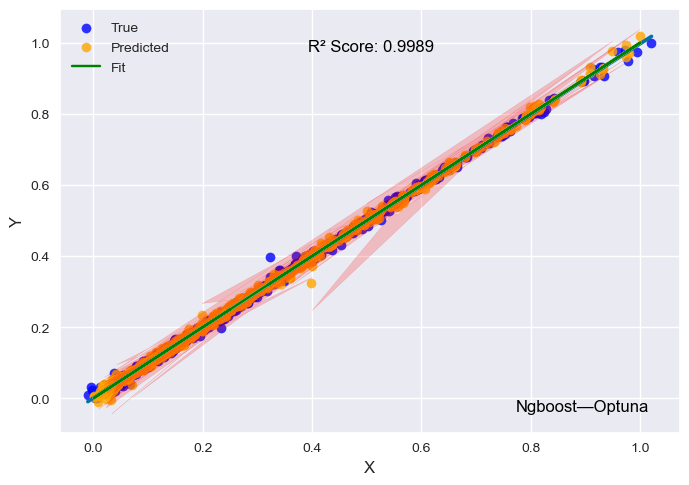

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
r2 = r2_score(y_test, y_pred)
slope, intercept, _, _, _ = stats.linregress(y_test, y_pred)
fit_line = intercept + slope * y_test
sns.set_style('darkgrid')
sns.regplot(x=y_pred, y=y_test, label='True', scatter_kws={'color': 'blue'})
sns.regplot(x=y_test, y=y_pred, label='Predicted', scatter_kws={'color': 'orange'})
plt.plot(y_test, fit_line, label='Fit', color='green')
plt.fill_between(y_test, y_pred - (y_pred - y_test), y_pred + (y_pred - y_test), alpha=0.2, color='red')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.text(0.95, 0.05, 'Ngboost—Optuna', transform=plt.gca().transAxes, ha='right', color='black')
plt.text(0.4, 0.9, f'R² Score: {r2:.4f}', transform=plt.gca().transAxes, ha='left', color='black')
plt.show()